In [2]:
#!curl -L -o dataset.zip "https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=1"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 77164    0 77164    0     0   108k      0 --:--:-- --:--:-- --:--:--  108k


In [3]:
#!unzip dataset.zip


Archive:  dataset.zip


  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in dataset.zip,
        and cannot find dataset.zip.zip, period.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet

# Updated imports for image processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array

#  Building our Model To train the data 

In [5]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Preparing our data using data generator

In [7]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "train/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [8]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "train/train",
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

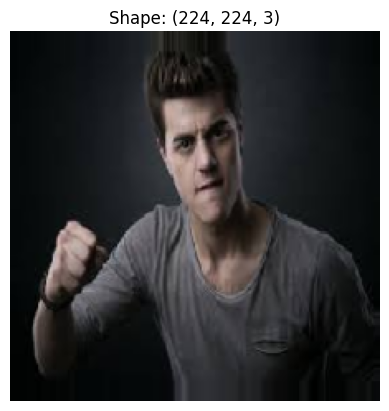

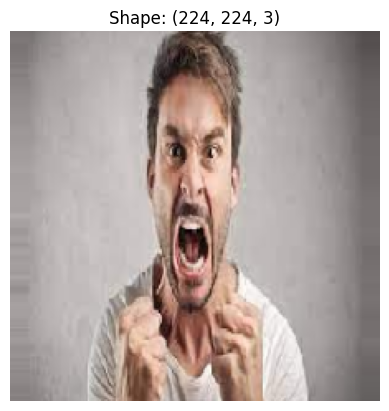

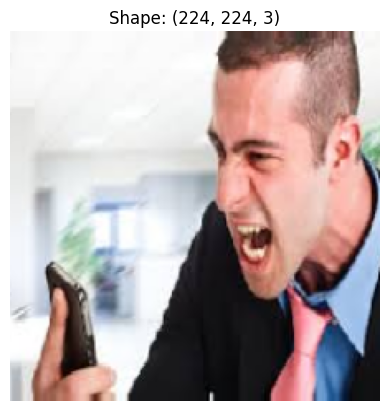

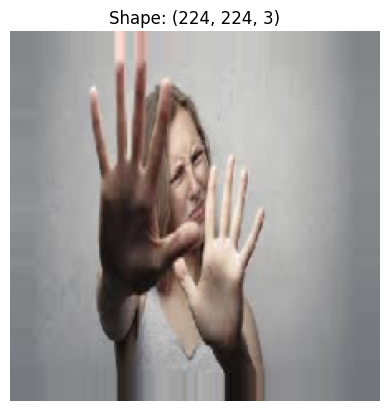

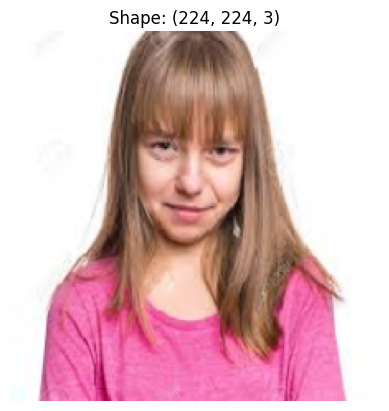

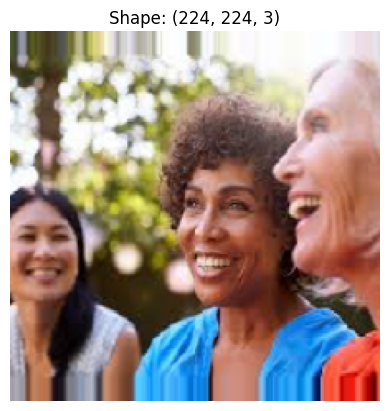

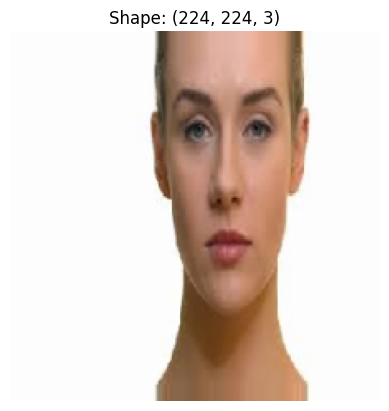

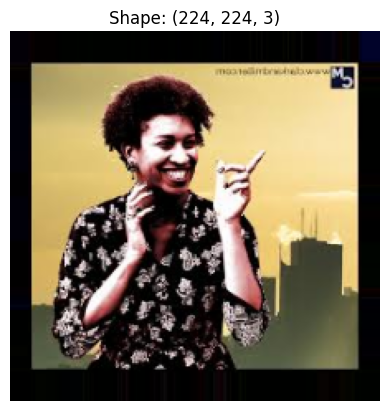

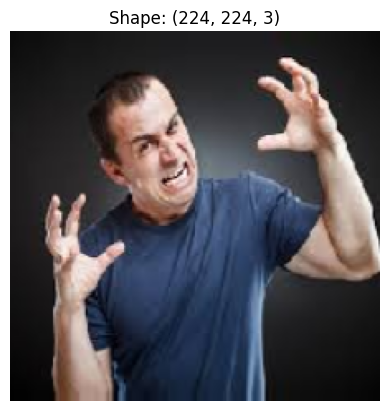

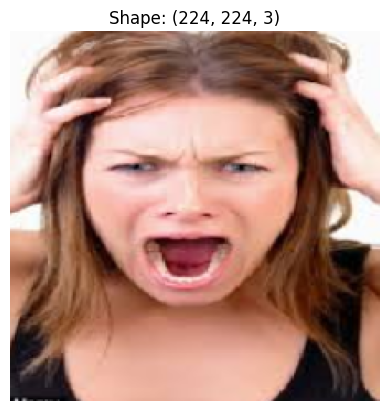

In [9]:
# Get a batch of images
t_img, label = next(train_data)

# Function to plot images
def plotImages(img_arr, label):
    """
    input  :- images array
    output :- plots the images
    """
    count = 0
    for im, l in zip(img_arr, label):
        plt.imshow(im)
        plt.title(f"Shape: {im.shape}")
        plt.axis('off')
        plt.show()

        count += 1
        if count == 10:
            break

# Call function to plot images
plotImages(t_img, label)


# having early stopping and model check point

In [10]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.keras", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [12]:
hist = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data,
    callbacks=[es, mc]
)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 778ms/step - accuracy: 0.9602 - loss: 0.1142
Epoch 1: val_accuracy did not improve from 0.99609
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9629 - loss: 0.0896 - val_accuracy: 0.9771 - val_loss: 0.0871
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 769ms/step - accuracy: 0.9873 - loss: 0.0720
Epoch 2: val_accuracy did not improve from 0.99609
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9800 - loss: 0.1062 - val_accuracy: 0.9943 - val_loss: 0.0148
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 770ms/step - accuracy: 0.9802 - loss: 0.1107
Epoch 3: val_accuracy did not improve from 0.99609
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9857 - loss: 0.0605 - val_accuracy: 0.9914 - val_loss: 0.0360
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.9947 - loss: 0.0271
Epoch 4: val_accuracy improved from 0.99609 to 0.99714, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9886 - loss: 0.0

In [13]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.keras")

In [14]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

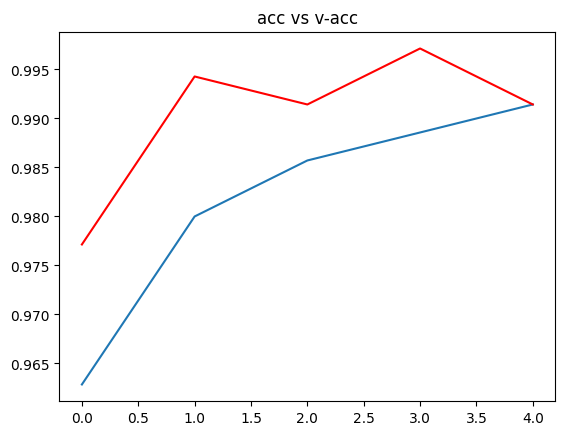

In [15]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

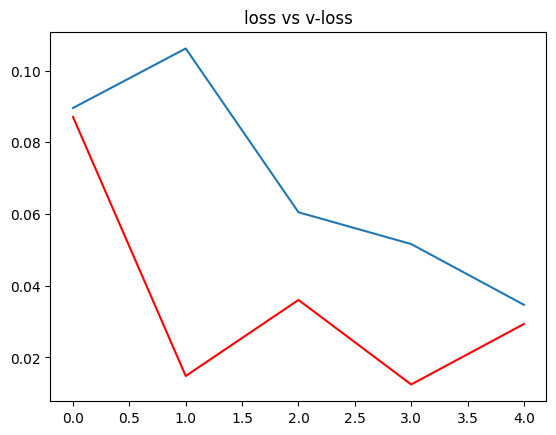

In [16]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [17]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
 the image is of Angry


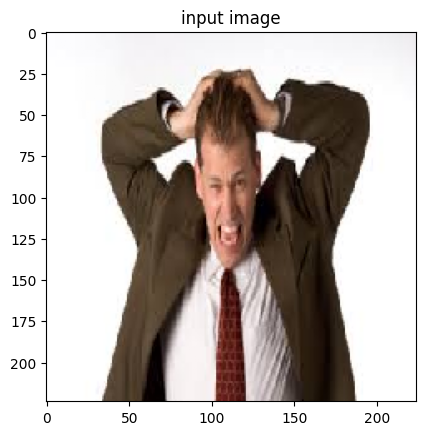

In [18]:
# path for the image to see if it predics correct class

path = "train/train/Angry/images.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()